In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import clear_output
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

clear_output()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import pathlib 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras import utils,layers, Sequential
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
url = "/kaggle/input/alzheimer-mri-dataset/Dataset"

In [5]:
data = pathlib.Path(url)

In [6]:
alzheimer_mri_img = {
    
    "Non_Demented" : list(data.glob("Non_Demented/*.jpg")),
    
    "Mild_Demented" : list(data.glob("Mild_Demented/*.jpg")),
    
    "Very_Mild_Demented" : list(data.glob("Very_Mild_Demented/*.jpg"))
    
}


In [7]:
alzheimer_mri_stage = {
    "Non_Demented" : 0,
    "Mild_Demented" : 1,
    "Very_Mild_Demented" : 2
}


In [8]:
print(str(alzheimer_mri_img["Non_Demented"][:5]))



[PosixPath('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg'), PosixPath('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg'), PosixPath('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg'), PosixPath('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg'), PosixPath('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg')]


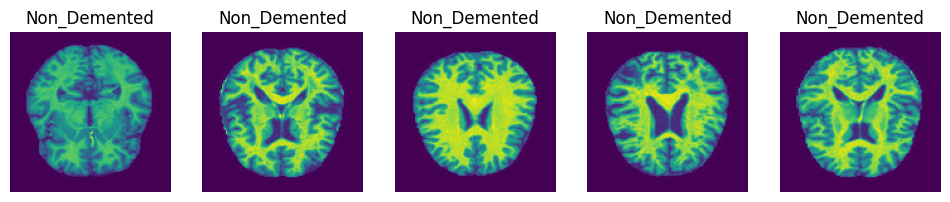

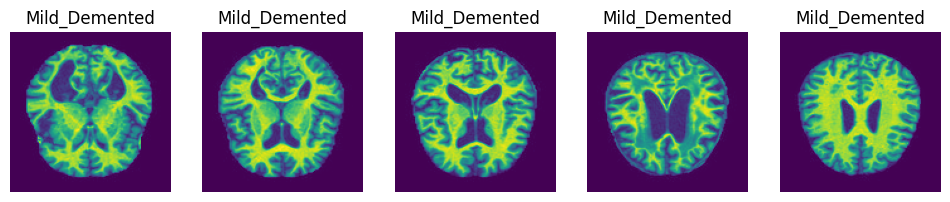

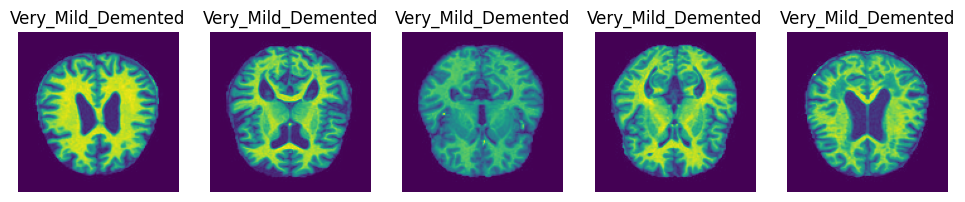

In [9]:
def display_mri(label):
    plt.figure(figsize=(12, 4))
    mri_imgs = alzheimer_mri_img[label][:5]
    for i, image in enumerate(mri_imgs):
        img = mpimg.imread(str(image))
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()
    
display_mri("Non_Demented")
display_mri("Mild_Demented")
display_mri("Very_Mild_Demented")


In [10]:
X = []
Y = []
for label, mris in alzheimer_mri_img.items():
    for mri in mris:
        img = cv2.imread(str(mri))
        img = img.astype("float32")/255
        X.append(img)
        Y.append(alzheimer_mri_stage[label])
    
    
    

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)


In [13]:
model = Sequential([
    #CNN layer
    layers.Conv2D(16,(3,3),padding="same",activation="relu",input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    #ANN layer
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(3,activation='softmax')
])



In [14]:
model.compile(
    optimizer='adam',
    loss  = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
159/159 [==============================] - 9s 7ms/step - loss: 1.1997 - accuracy: 0.4994
Epoch 2/5
159/159 [==============================] - 1s 7ms/step - loss: 0.8585 - accuracy: 0.5643
Epoch 3/5
159/159 [==============================] - 1s 7ms/step - loss: 0.6856 - accuracy: 0.6825
Epoch 4/5
159/159 [==============================] - 1s 7ms/step - loss: 0.4475 - accuracy: 0.8283
Epoch 5/5
159/159 [==============================] - 1s 7ms/step - loss: 0.2845 - accuracy: 0.9015


In [16]:
model.evaluate(X_test,Y_test)

40/40 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.9219


[0.24943502247333527, 0.9219242930412292]

In [17]:
mri_scan = "/kaggle/input/unknown-mri-alzheimers-img/mri_alzheimer.jpg"
img = cv2.imread(mri_scan)
img = img.astype('float32') / 255
img = cv2.resize(img, (128, 128))
img = np.array([img])

In [18]:
alzheimers_prediction = model.predict(img)

1/1 [==============================] - 0s 106ms/step


In [19]:
alzheimers_labels = ["Non_Demented", "Meningioma Tumor", "Very_Mild_Demented", "Pituitary Tumor"]
highest_probability = np.argmax(alzheimers_prediction)
diagnosis = alzheimers_labels[highest_probability]

In [20]:
print(f"Based on the provided MRI, the model has an 90% level of confidence that the diagnosis is {diagnosis}.")

Based on the provided MRI, the model has an 90% level of confidence that the diagnosis is Non_Demented.
